In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns


In [76]:
cifar_dataset = fetch_openml('CIFAR_10_small', version=1, parser='auto', as_frame=False)
X, y = cifar_dataset['data'], cifar_dataset['target'].astype('int32')

print("\nAnalisi iniziale del dataset:")
print(f"- Campioni totali nel dataset: {X.shape[0]:,}")
print(f"- Dimensioni features per immagine: {X.shape[1]} (32x32x3 canali RGB)")
print(f"- Range valori target: da {y.min()} a {y.max()}")
print(f"- Tipologia features: {type(X)}")
print(f"- Tipologia targets: {type(y)}")

subset_ratio = 0.1  # Manteniamo solo il 10% del dataset originale

# Creazione del sottoinsieme bilanciato
X_reduced, _, y_reduced, _ = train_test_split(
    X, y,
    train_size=subset_ratio,
    random_state=42,    # Per riproducibilità
    shuffle=True,       # Mescola i dati prima della divisione
    stratify=y          # Preserva la distribuzione delle classi
)

train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

# Calcolo delle dimensioni dei set
n_train = int(train_ratio * X_reduced.shape[0])
n_val = int(val_ratio * X_reduced.shape[0])
n_test = int(test_ratio * X_reduced.shape[0])

# Divisione manuale dei dati
X_train = X_reduced[:n_train]
y_train = y_reduced[:n_train]

X_validation = X_reduced[n_train:n_train+n_val]
y_validation = y_reduced[n_train:n_train+n_val]

X_test = X_reduced[n_train+n_val:]
y_test = y_reduced[n_train+n_val:]

# Verifica dimensioni
print("\nDistribuzione del dataset ridotto:")
print(f"● Training: {X_train.shape} ({(train_ratio*100):.0f}%)")
print(f"● Validation: {X_validation.shape} ({(val_ratio*100):.0f}%)")
print(f"● Test: {X_test.shape} ({(test_ratio*100):.0f}%)")

# Standardizzazione delle features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_validation_std = scaler.transform(X_validation)
X_test_std = scaler.transform(X_test)


Analisi iniziale del dataset:
- Campioni totali nel dataset: 20,000
- Dimensioni features per immagine: 3072 (32x32x3 canali RGB)
- Range valori target: da 0 a 9
- Tipologia features: <class 'numpy.ndarray'>
- Tipologia targets: <class 'numpy.ndarray'>

Distribuzione del dataset ridotto:
● Training: (1200, 3072) (60%)
● Validation: (400, 3072) (20%)
● Test: (400, 3072) (20%)


● Regressione Logistica ●


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



● Performance su Validation Set ●
              precision    recall  f1-score   support

           0       0.31      0.27      0.29        44
           1       0.29      0.25      0.27        36
           2       0.22      0.26      0.24        38
           3       0.27      0.24      0.25        38
           4       0.26      0.27      0.26        41
           5       0.20      0.29      0.24        34
           6       0.29      0.30      0.30        46
           7       0.37      0.36      0.37        36
           8       0.41      0.42      0.41        43
           9       0.42      0.32      0.36        44

    accuracy                           0.30       400
   macro avg       0.30      0.30      0.30       400
weighted avg       0.31      0.30      0.30       400

► Accuratezza: 0.3000

● Performance su Test Set ●
              precision    recall  f1-score   support

           0       0.43      0.38      0.40        32
           1       0.46      0.28      0.35   

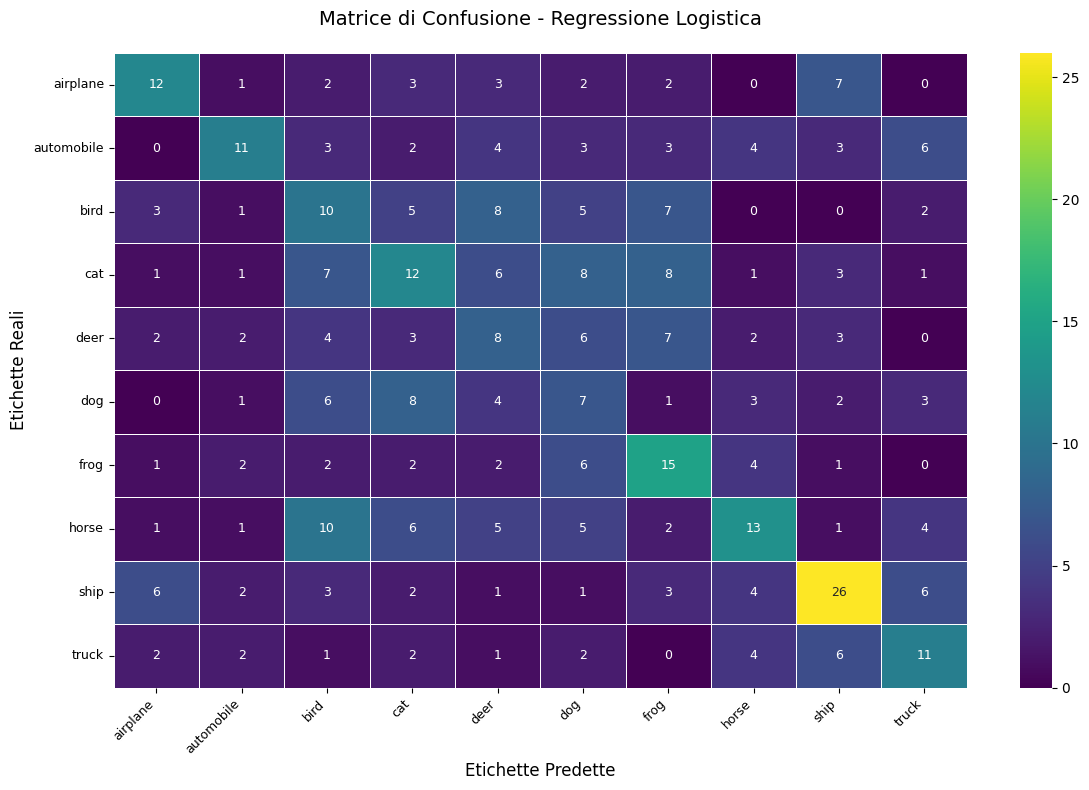

In [77]:
 class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]


print("● Regressione Logistica ●")
classifier = LogisticRegression(max_iter=2000, 
                              random_state=42, 
                              n_jobs=-1,
                              verbose=1)
classifier.fit(X_train_std, y_train)

# Valutazione prestazioni
def evaluate_model(model, X, y, set_name):
    predictions = model.predict(X)
    print(f"\n● Performance su {set_name} ●")
    print(classification_report(y, predictions))
    print(f"► Accuratezza: {accuracy_score(y, predictions):.4f}")
    return predictions

# Valutazione sui diversi set
val_predictions = evaluate_model(classifier, X_validation_std, y_validation, "Validation Set")
test_predictions = evaluate_model(classifier, X_test_std, y_test, "Test Set")

# Visualizzazione matrice di confusione
plt.figure(figsize=(12, 8))
conf_matrix = confusion_matrix(y_test, test_predictions)
sns.heatmap(conf_matrix,
            annot=True,
            fmt='g',
            cmap='viridis',
            linewidths=0.5,
            xticklabels=class_names,
            yticklabels=class_names,
            annot_kws={"fontsize":9})

plt.title('Matrice di Confusione - Regressione Logistica', fontsize=14, pad=20)
plt.xlabel('Etichette Predette', fontsize=12)
plt.ylabel('Etichette Reali', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

k-Nearest Neighbors Classifier

 Performance sul Validation Set:
──────────────────────────────────
              precision    recall  f1-score   support

           0     0.2759    0.5455    0.3664        44
           1     0.5000    0.0556    0.1000        36
           2     0.1491    0.4474    0.2237        38
           3     0.1818    0.0526    0.0816        38
           4     0.1724    0.2439    0.2020        41
           5     0.2500    0.0882    0.1304        34
           6     0.2069    0.2609    0.2308        46
           7     0.6250    0.1389    0.2273        36
           8     0.5682    0.5814    0.5747        43
           9     0.5000    0.0455    0.0833        44

    accuracy                         0.2550       400
   macro avg     0.3429    0.2460    0.2220       400
weighted avg     0.3418    0.2550    0.2280       400

 Accuracy Score: 0.2550
 Balanced Accuracy: 0.2460

 Performance sul Test Set:
──────────────────────────────────
              precision    

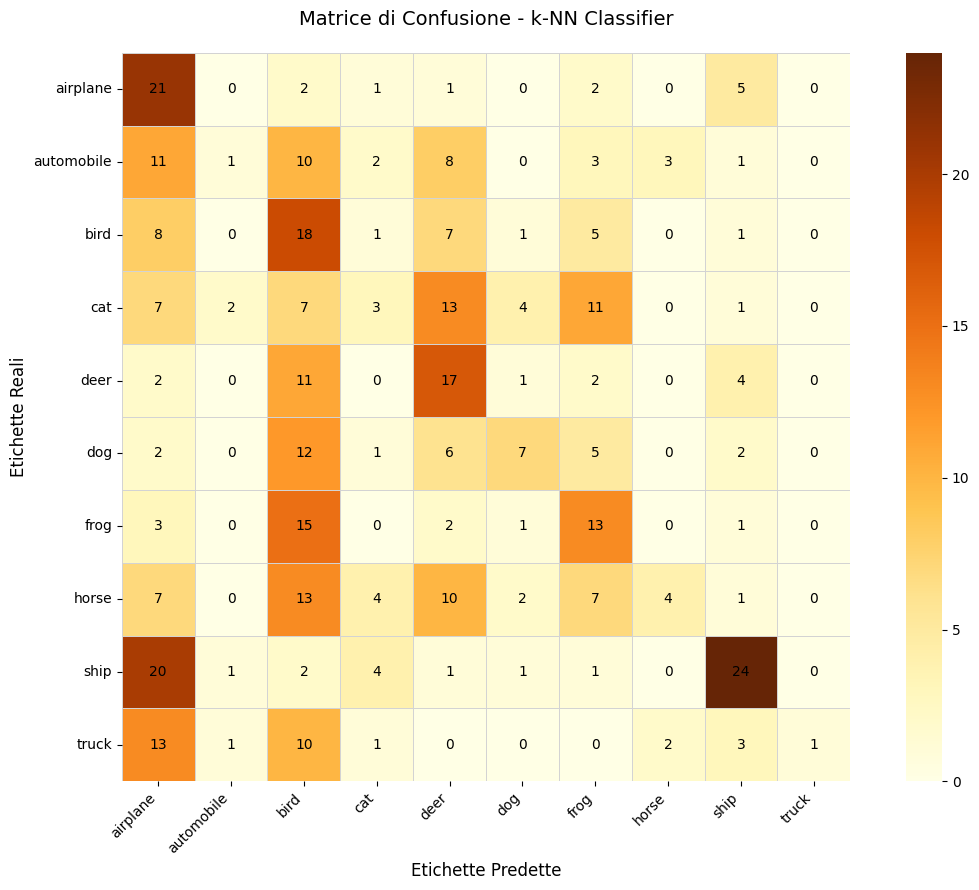

In [78]:
from sklearn.metrics import balanced_accuracy_score
print("k-Nearest Neighbors Classifier")

# Configurazione e training del modello
knn_model = KNeighborsClassifier(
    n_neighbors=5,      # Numero di vicini da considerare
    algorithm='auto',   # Scelta automatica dell'algoritmo ottimale
    weights='uniform',  # Peso uniforme per tutti i vicini
    n_jobs=-1          # Utilizzo di tutti i core disponibili
)
knn_model.fit(X_train_std, y_train)

def evaluate_knn_performance(model, X_data, y_true, dataset_name):
    """
    Valuta le prestazioni del modello KNN e stampa i risultati
    """
    predictions = model.predict(X_data)
    print(f"\n Performance sul {dataset_name} Set:")
    print("──────────────────────────────────")
    print(classification_report(y_true, predictions, digits=4))
    print(f" Accuracy Score: {accuracy_score(y_true, predictions):.4f}")
    print(f" Balanced Accuracy: {balanced_accuracy_score(y_true, predictions):.4f}")
    return predictions

# Valutazione sui diversi dataset
val_preds = evaluate_knn_performance(knn_model, X_validation_std, y_validation, "Validation")
test_preds = evaluate_knn_performance(knn_model, X_test_std, y_test, "Test")

# Visualizzazione avanzata della matrice di confusione
plt.figure(figsize=(12, 9))
conf_mat = confusion_matrix(y_test, test_preds)

sns.heatmap(
    conf_mat,
    annot=True,
    fmt='d',
    cmap='YlOrBr',      # Cambiato colormap per differenziarsi
    linewidths=0.5,
    linecolor='lightgray',
    square=True,        # Celle quadrate per migliore visualizzazione
    xticklabels=class_names,
    yticklabels=class_names,
    annot_kws={"size": 10, "color": "black"}
)

plt.title('Matrice di Confusione - k-NN Classifier', fontsize=14, pad=20)
plt.xlabel('Etichette Predette', fontsize=12)
plt.ylabel('Etichette Reali', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


Support Vector Machine (SVM)

Risultati di Validazione:

 Performance sul Validation Set:
              precision    recall  f1-score   support

           0     0.4348    0.4545    0.4444        44
           1     0.4800    0.3333    0.3934        36
           2     0.2800    0.3684    0.3182        38
           3     0.2500    0.1053    0.1481        38
           4     0.2444    0.2683    0.2558        41
           5     0.2979    0.4118    0.3457        34
           6     0.3519    0.4130    0.3800        46
           7     0.4000    0.2778    0.3279        36
           8     0.5227    0.5349    0.5287        43
           9     0.3958    0.4318    0.4130        44

    accuracy                         0.3650       400
   macro avg     0.3658    0.3599    0.3555       400
weighted avg     0.3679    0.3650    0.3597       400

🔹 Accuracy: 0.3650
🔹 Balanced Accuracy: 0.3599

Risultati sul Test Set:

 Performance sul Test Set:
              precision    recall  f1-score   supp

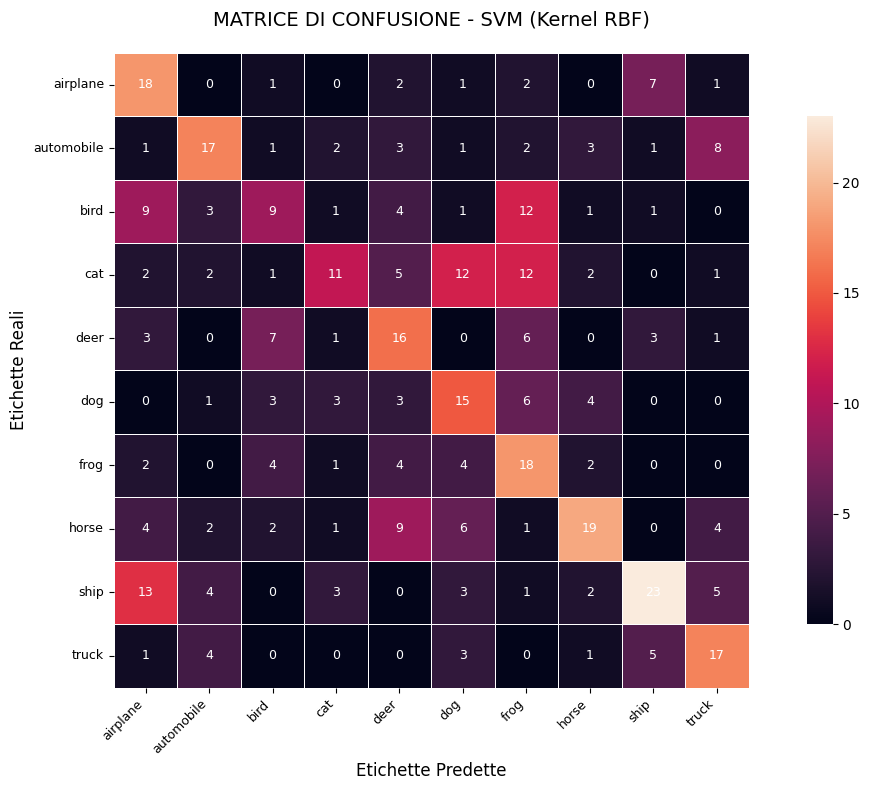

In [79]:
print("\nSupport Vector Machine (SVM)")

# Configurazione del modello SVM con kernel RBF
svm_model = SVC(
    kernel='rbf', 
    C=1.0,               # Parametro di regolarizzazione
    gamma='scale',       # Impostazione automatica del gamma
    random_state=42,     # Per riproducibilità
    probability=True     # Abilita predict_proba per metriche aggiuntive
)

# Addestramento su sottoinsieme ridotto
svm_model.fit(X_train_std[:1000], y_train[:1000])

def evaluate_svm_performance(model, X_data, y_true, set_type):
    """
    Valuta e stampa le performance del modello SVM
    """
    predictions = model.predict(X_data)
    print(f"\n Performance sul {set_type} Set:")
    print("="*50)
    print(classification_report(y_true, predictions, digits=4))
    print(f"🔹 Accuracy: {accuracy_score(y_true, predictions):.4f}")
    print(f"🔹 Balanced Accuracy: {balanced_accuracy_score(y_true, predictions):.4f}")
    return predictions

# Valutazione completa
print("\nRisultati di Validazione:")
val_preds = evaluate_svm_performance(svm_model, X_validation_std, y_validation, "Validation")

print("\nRisultati sul Test Set:")
test_preds = evaluate_svm_performance(svm_model, X_test_std, y_test, "Test")

# Visualizzazione avanzata della matrice di confusione
plt.figure(figsize=(12, 8))
conf_mat = confusion_matrix(y_test, test_preds)

sns.heatmap(
    conf_mat, 
    annot=True,
    fmt='d',
    cmap='rocket',      # Cambiato colormap per differenziarsi
    linewidths=.5,
    square=True,
    xticklabels=class_names,
    yticklabels=class_names,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 9, "color": "white"}
)

plt.title('MATRICE DI CONFUSIONE - SVM (Kernel RBF)', fontsize=14, pad=20)
plt.xlabel('Etichette Predette', fontsize=12)
plt.ylabel('Etichette Reali', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()


 Albero Decisionale 

 Validazione:

 Performance sul Validazione Set:
════════════════════════════════════════
              precision    recall  f1-score   support

           0     0.3077    0.3636    0.3333        44
           1     0.0392    0.0556    0.0460        36
           2     0.1475    0.2368    0.1818        38
           3     0.0526    0.0526    0.0526        38
           4     0.1875    0.1463    0.1644        41
           5     0.1538    0.1765    0.1644        34
           6     0.2667    0.2609    0.2637        46
           7     0.1538    0.1111    0.1290        36
           8     0.3889    0.1628    0.2295        43
           9     0.2895    0.2500    0.2683        44

    accuracy                         0.1875       400
   macro avg     0.1987    0.1816    0.1833       400
weighted avg     0.2068    0.1875    0.1900       400

🔹 Accuratezza: 0.1875

 Test:

 Performance sul Test Set:
════════════════════════════════════════
              precision    re

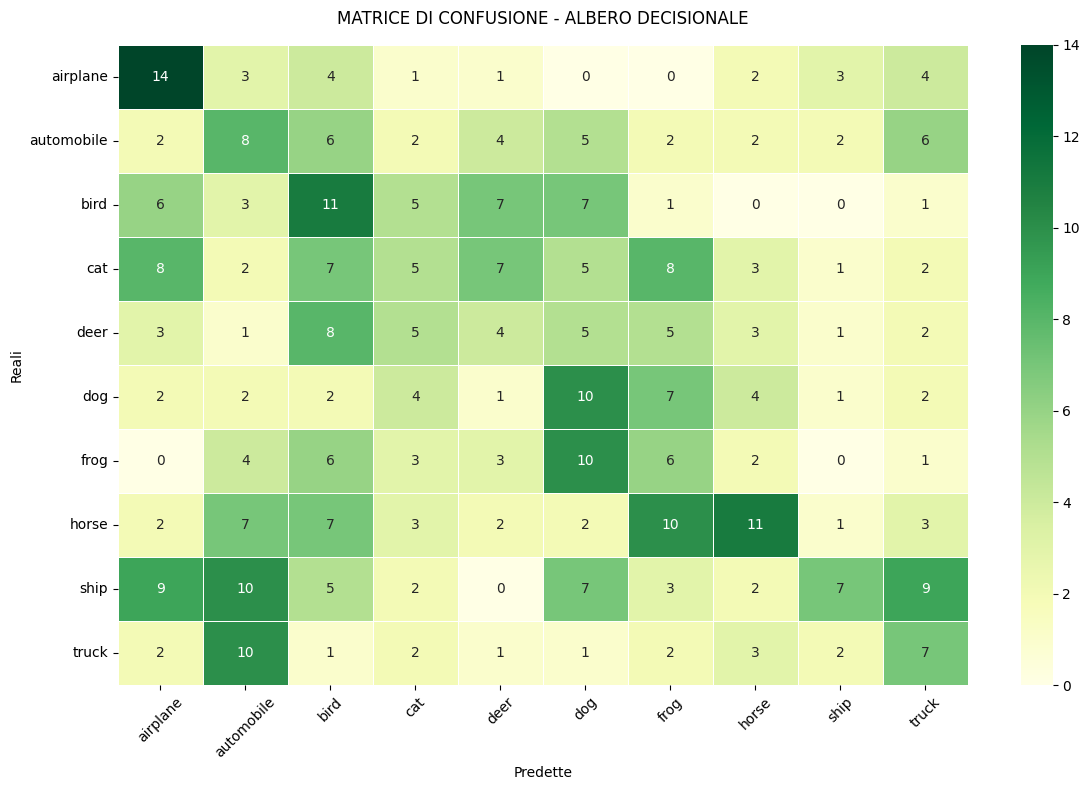

In [80]:
print("\n Albero Decisionale ")

# Configurazione del modello
dt_model = DecisionTreeClassifier(
    max_depth=10,          # Limita la profondità
    random_state=42,       # Per riproducibilità
    min_samples_leaf=5     # Previene overfitting
)

# Addestramento
dt_model.fit(X_train, y_train)

def valuta_modello(model, X, y, nome_set):
    pred = model.predict(X)
    print(f"\n Performance sul {nome_set} Set:")
    print("═" * 40)
    print(classification_report(y, pred, digits=4))
    print(f"🔹 Accuratezza: {accuracy_score(y, pred):.4f}")
    return pred

# Valutazioni
print("\n Validazione:")
pred_val = valuta_modello(dt_model, X_validation, y_validation, "Validazione")

print("\n Test:")
pred_test = valuta_modello(dt_model, X_test, y_test, "Test")

# Visualizzazione matrice di confusione
plt.figure(figsize=(12, 8))
sns.heatmap(
    confusion_matrix(y_test, pred_test),
    annot=True,
    fmt='d',
    cmap='YlGn',  # Verde chiaro
    linewidths=.5,
    xticklabels=class_names,
    yticklabels=class_names
)

plt.title('MATRICE DI CONFUSIONE - ALBERO DECISIONALE', pad=15)
plt.xlabel('Predette')
plt.ylabel('Reali')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [81]:
# Dizionario dei modelli addestrati
models_dict  = {
    'Regressione Logistica': evaluate_model,
    'k-Vicini più Vicini': evaluate_knn_performance,
    'Macchina a Vettori di Supporto': evaluate_svm_performance,
    'Albero Decisionale': valuta_modello
}

print("\n Confronto Prestazioni Modelli")
print("=" * 40)

for name, model in models_dict.items():
    X_val = X_validation if name == 'Albero' else X_validation_std
    acc = accuracy_score(y_validation, model.predict(X_val))
    print(f"{name:>20}: {acc:.4f}")

best_name = max(models_dict.keys(), 
               key=lambda x: accuracy_score(
                   y_validation, 
                   models_dict[x].predict(
                       X_validation if x == 'Albero' else X_validation_std
                   )
               ))

print(f"\n Miglior modello: {best_name} (Validation)")
print("\n Report Test Set:")
X_test_eval = X_test if best_name == 'Albero' else X_test_std
print(classification_report(y_test, models_dict[best_name].predict(X_test_eval)))


 Confronto Prestazioni Modelli


AttributeError: 'function' object has no attribute 'predict'